# Simulating logic gates using `crysx_nn`

In [1]:
import cupy as cp
import matplotlib.pyplot as plt

## Define some network parameters that we will be using toninitialize the model

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Create the neural network model

In [3]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='GPU', init_method='Xavier') 

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  GPU


## Check the details of the model for confirmation

In [4]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  2
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [3, 1]
Activation function for each layer (hidden & output):   ['Tanh_offset', 'Tanh_offset']
Method used for weights and biases initialization:   Xavier
Batch Size:  4
Device:  GPU
Optimization method:  SGD
Learning rate:  0.5
----------------------------------------------------------------------------------


## Visualize the network

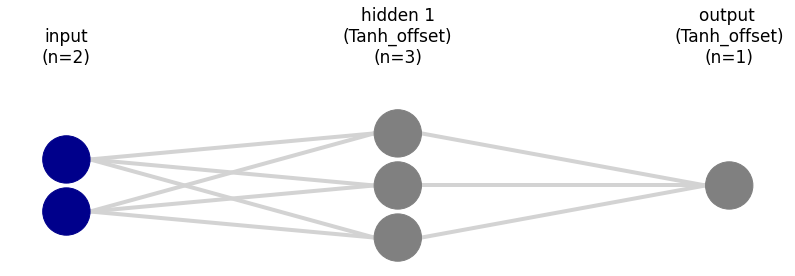

In [5]:
model.visualize()

## Initial Weights and Biases being used by the network

In [6]:
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.52959995,  0.31404814],
       [-0.31912165,  0.41259796],
       [ 0.51599125,  0.30448372]]), array([[-0.29278659,  0.16435603,  0.02375726]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [7]:
inputs = cp.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [8]:
# AND function
outputAND = cp.array([0.,0.,0.,1.])
outputAND = cp.asarray([outputAND]).T
# OR function
outputOR = cp.array([0.,1.,1.,1.])
outputOR = cp.asarray([outputOR]).T
# NAND function
outputNAND = cp.array([1.,1.,1.,0.])
outputNAND = cp.asarray([outputNAND]).T
# XOR function
outputXOR = cp.array([0.,1.,1.,0.])
outputXOR = cp.asarray([outputXOR]).T

In [9]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## You can also reinitialize weights and biases using some other method

In [10]:
model.init_params(method='NormXavier')
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.44640825,  1.89721245],
       [-1.17047383, -1.2419836 ],
       [-0.11140865, -1.88912805]]), array([[ 1.51115277, -0.97207857,  0.73094574]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [11]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [12]:

# Run optimization
model.optimize(inputs, outputAND, lr=0.5,nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.5934003176315444


### Visualize the training loss

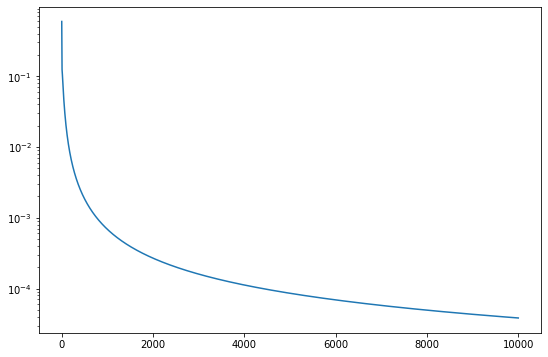

In [13]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [14]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 1.11899601,  1.7454311 ],
       [-2.1074081 , -1.52034627],
       [-0.33200468, -1.89770119]]), array([[ 3.38592467, -4.29433035, -0.02309908]])]
Optimized Biases:  [array([-1.90151443,  2.51317373, -0.35086516]), array([-0.19545553])]


### Make predictions using the optimized weights

In [15]:
predictions, error = model.predict(inputs, outputAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[1.52050286e-04]
 [6.17168713e-03]
 [5.61671175e-03]
 [9.90849118e-01]]
Expected Output:
 [[0.]
 [0.]
 [0.]
 [1.]]
New Average Error with optimized weights:
 3.834973412321436e-05


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [16]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.29321037,  0.02619505],
       [ 0.56607609,  0.14717526],
       [-0.20156448,  0.44781201]]), array([[-0.21838301, -0.0306336 , -0.27918338]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [17]:

# Run optimization
model.optimize(inputs, outputNAND, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.3360440453990996


### Visualize the training loss

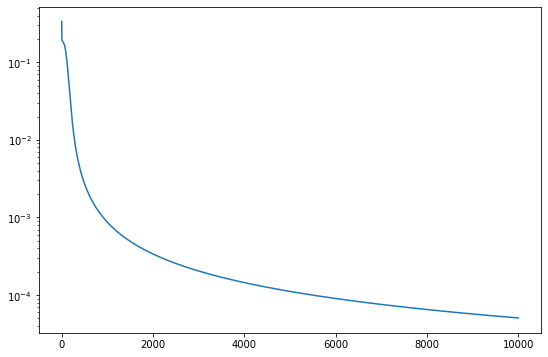

In [18]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[1.36803   , 1.29980621],
       [1.53612704, 1.4630332 ],
       [1.35950524, 1.49892204]]), array([[-2.38237265, -2.80724378, -2.63764071]])]
Optimized Biases:  [array([-2.05176302, -2.29718822, -2.1931904 ]), array([3.82025869])]


### Make predictions using the optimized weights

In [20]:
predictions, error = model.predict(inputs, outputNAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputNAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.99941428]
 [0.99207819]
 [0.99207455]
 [0.0087666 ]]
Expected Output:
 [[1.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 5.069102112420413e-05


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [21]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.24305433,  0.49111781],
       [-0.20070397, -0.53646836],
       [-0.51685422, -0.30314416]]), array([[ 0.22488938, -0.13644779,  0.44841657]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [22]:

# Run optimization
model.optimize(inputs, outputOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.20948589969047055


### Visualize the training loss

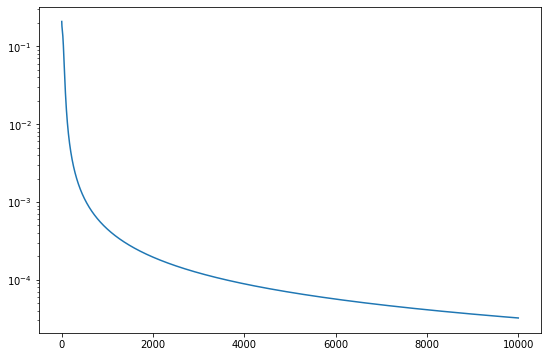

In [23]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [24]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 1.97092203,  1.98383959],
       [-1.74509197, -1.79346384],
       [-0.71554162, -0.55838768]]), array([[ 3.49001267, -2.9868896 , -0.86952641]])]
Optimized Biases:  [array([-0.90174323,  0.79050509,  0.103551  ]), array([0.04758489])]


### Make predictions using the optimized weights

In [25]:
predictions, error = model.predict(inputs, outputOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.00791342]
 [0.99422573]
 [0.99436495]
 [0.99897554]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [1.]]
New Average Error with optimized weights:
 3.2191936118923905e-05


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [26]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.66631224, -0.53592678],
       [-0.305388  ,  0.2755237 ],
       [ 0.01039654, -0.02582477]]), array([[-0.15410334, -0.13688822, -0.50320282]])]
Initial Biases:
 [array([0., 0., 0.]), array([0.])]


In [27]:

# Run optimization
model.optimize(inputs, outputXOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.27758281494390746


### Visualize the training loss

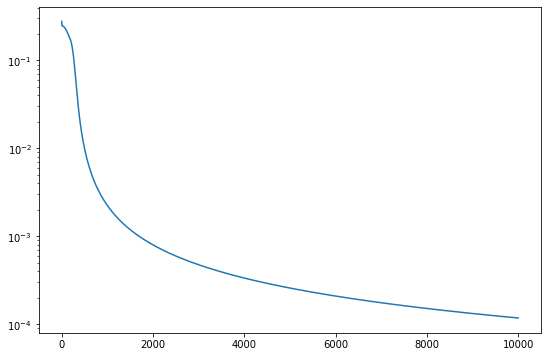

In [28]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [29]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-3.37589701, -3.29115388],
       [-0.76207933, -0.6614691 ],
       [ 2.29497903,  2.35550624]]), array([[-5.60408866,  1.74132995, -4.95136736]])]
Optimized Biases:  [array([ 1.38892029,  1.26884364, -3.60858578]), array([1.40231405])]


### Make predictions using the optimized weights

In [30]:
predictions, error = model.predict(inputs, outputXOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputXOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.01069495]
 [0.98900351]
 [0.98885503]
 [0.01068383]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 0.00011841489414008682
